# 🚦 Bangalore Traffic Wasted Time Prediction

### Objective
Estimate the extra minutes wasted in Bangalore traffic beyond ideal travel time, using roadway, congestion and environmental indicators.

--- 


In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)



# 2. Load Dataset


In this section we load the raw dataset into the notebook and take a first look at its structure.


In [2]:
df = pd.read_csv(r"C:\great learning self paced\machine learning from scratch\ml projects\bangalore-traffic-wasted-time-prediction\data\raw\Banglore_traffic_Dataset.csv")
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [3]:
df.shape

(8936, 16)

# 3. Initial Exploration

Let us take a first look at the structure and basic statistics of the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Traffic Volume,8936.0,29236.048120,13001.808801,4233.000000,19413.000000,27600.000000,38058.500000,72039.000000
Average Speed,8936.0,39.447427,10.707244,20.000000,31.775825,39.199368,46.644517,89.790843
Travel Time Index,8936.0,1.375554,0.165319,1.000039,1.242459,1.500000,1.500000,1.500000
Congestion Level,8936.0,80.818041,23.533182,5.160279,64.292905,92.389018,100.000000,100.000000
Road Capacity Utilization,8936.0,92.029215,16.583341,18.739771,97.354990,100.000000,100.000000,100.000000
Incident Reports,8936.0,1.570389,1.420047,0.000000,0.000000,1.000000,2.000000,10.000000
Environmental Impact,8936.0,108.472096,26.003618,58.466000,88.826000,105.200000,126.117000,194.078000
Public Transport Usage,8936.0,45.086651,20.208460,10.006853,27.341191,45.170684,62.426485,79.979744
Traffic Signal Compliance,8936.0,79.950243,11.585006,60.003933,69.828270,79.992773,89.957358,99.993652
Parking Usage,8936.0,75.155597,14.409394,50.020411,62.545895,75.317610,87.518589,99.995049


In [6]:
df.isnull().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()


Date                                   952
Area Name                                8
Road/Intersection Name                  16
Traffic Volume                        8100
Average Speed                         8572
Travel Time Index                     3711
Congestion Level                      5053
Road Capacity Utilization             2352
Incident Reports                        11
Environmental Impact                  8100
Public Transport Usage                8936
Traffic Signal Compliance             8936
Parking Usage                         8936
Pedestrian and Cyclist Count           148
Weather Conditions                       5
Roadwork and Construction Activity       2
dtype: int64

## 3.1 Visual Exploration

In this section we explore variable distributions, detect outliers and understand relationships between important features.


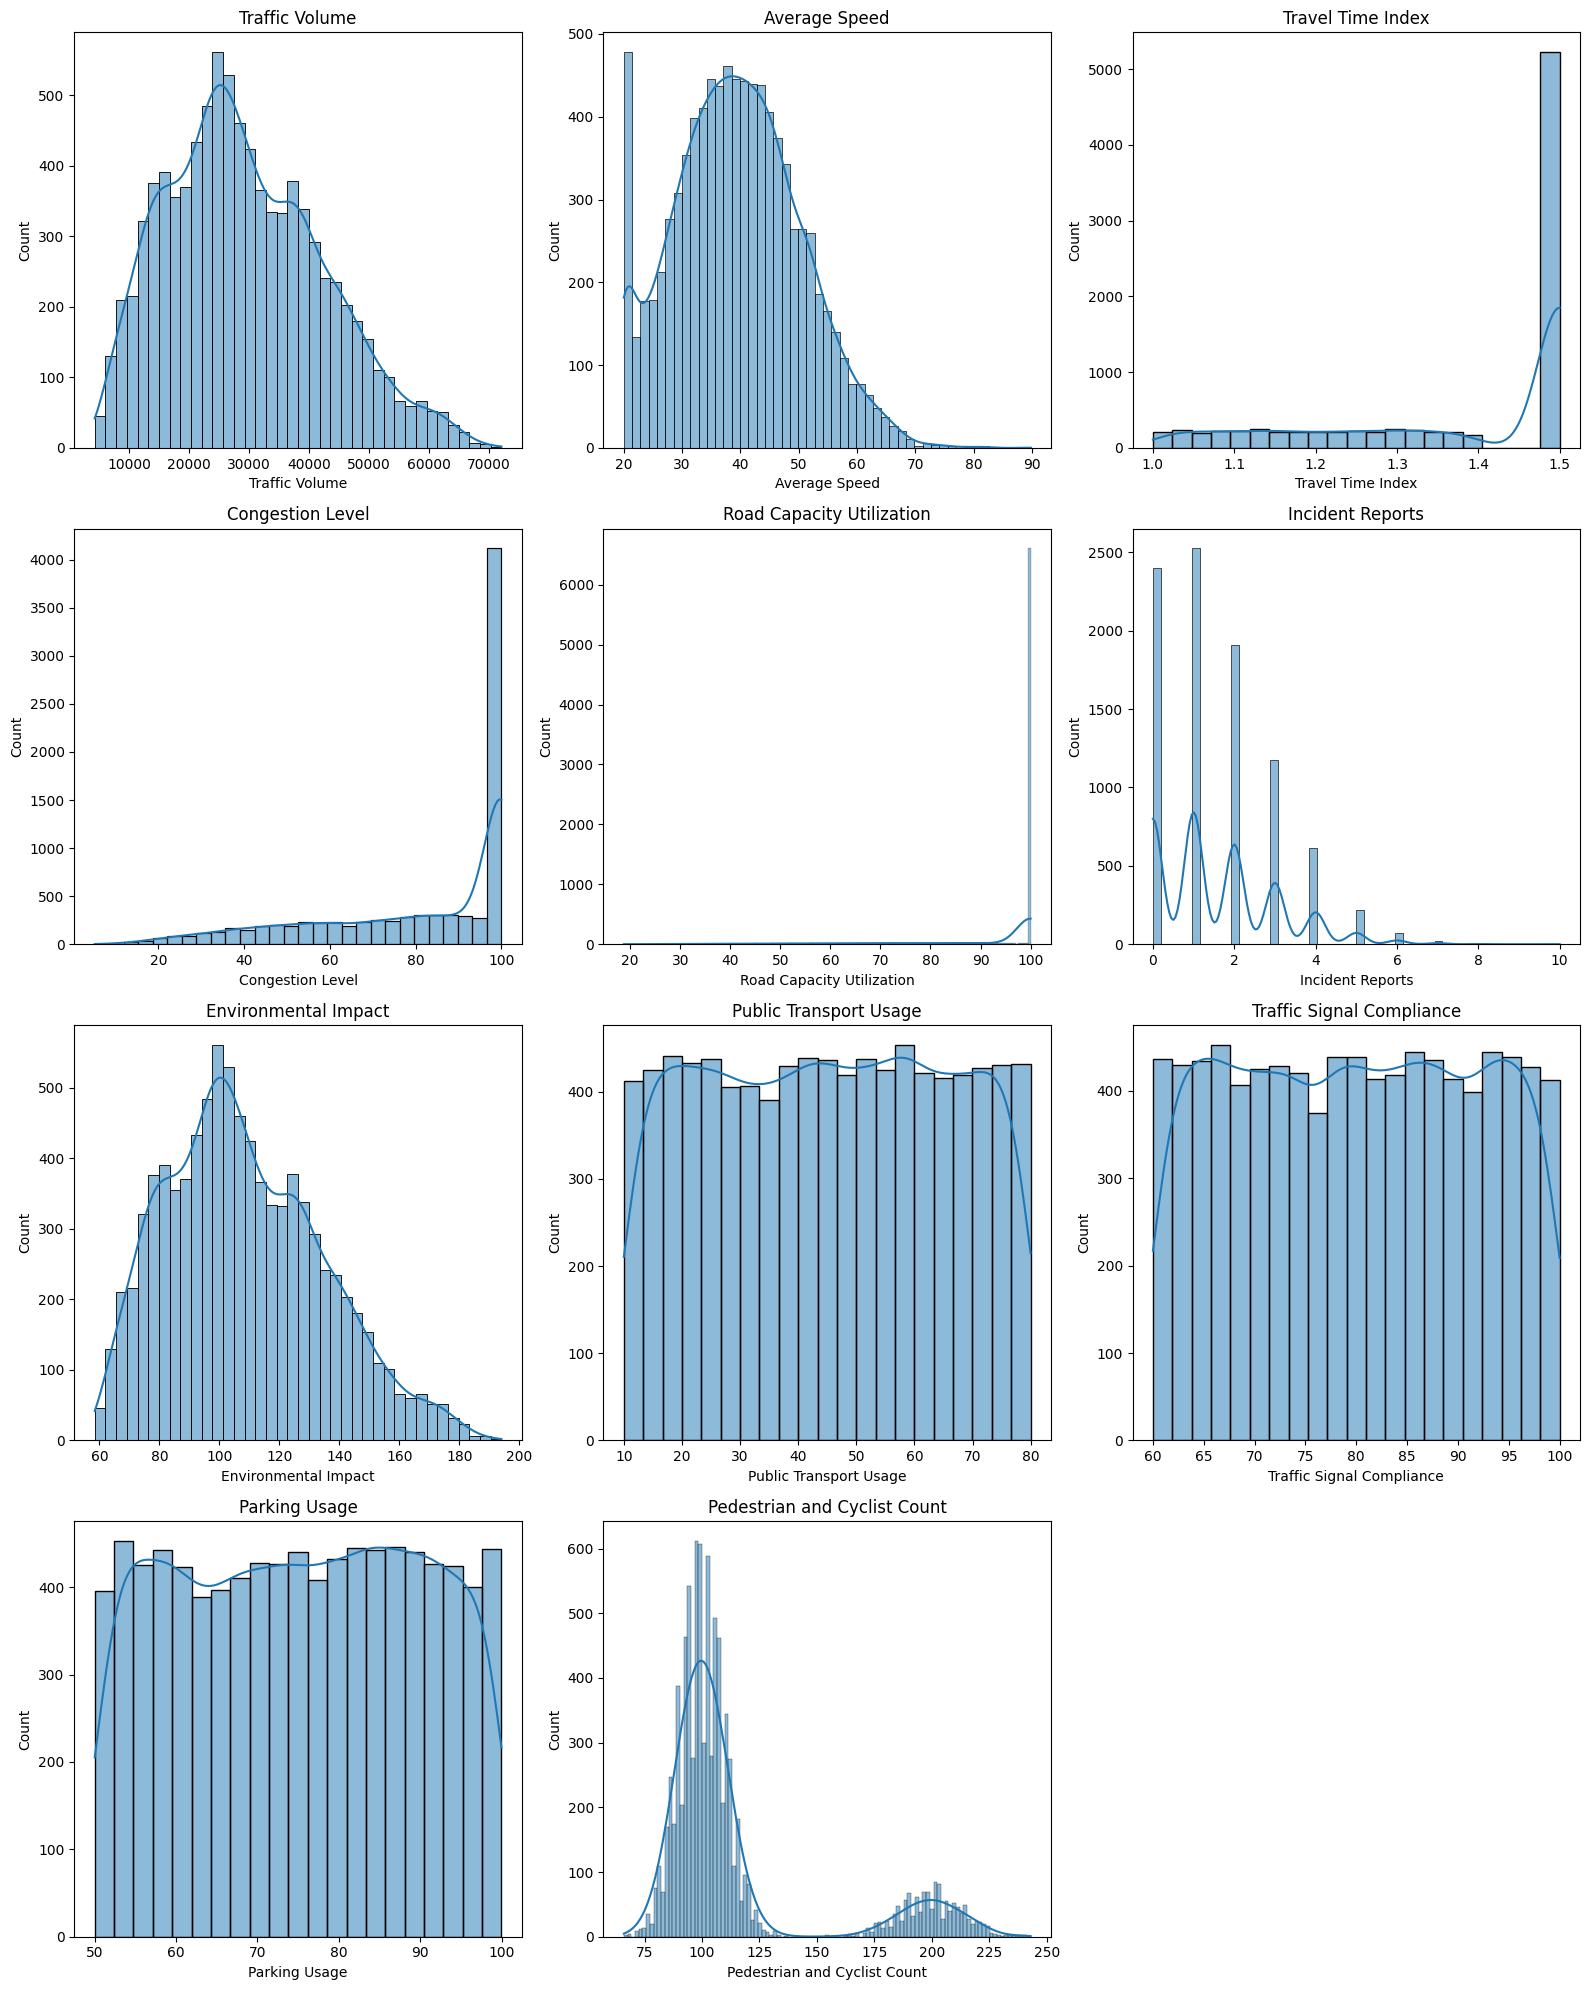

In [9]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(16,20))

for i, col in enumerate(numeric_cols,1):
    plt.subplot(len(numeric_cols)// 3 + 1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Boxplot Analysis


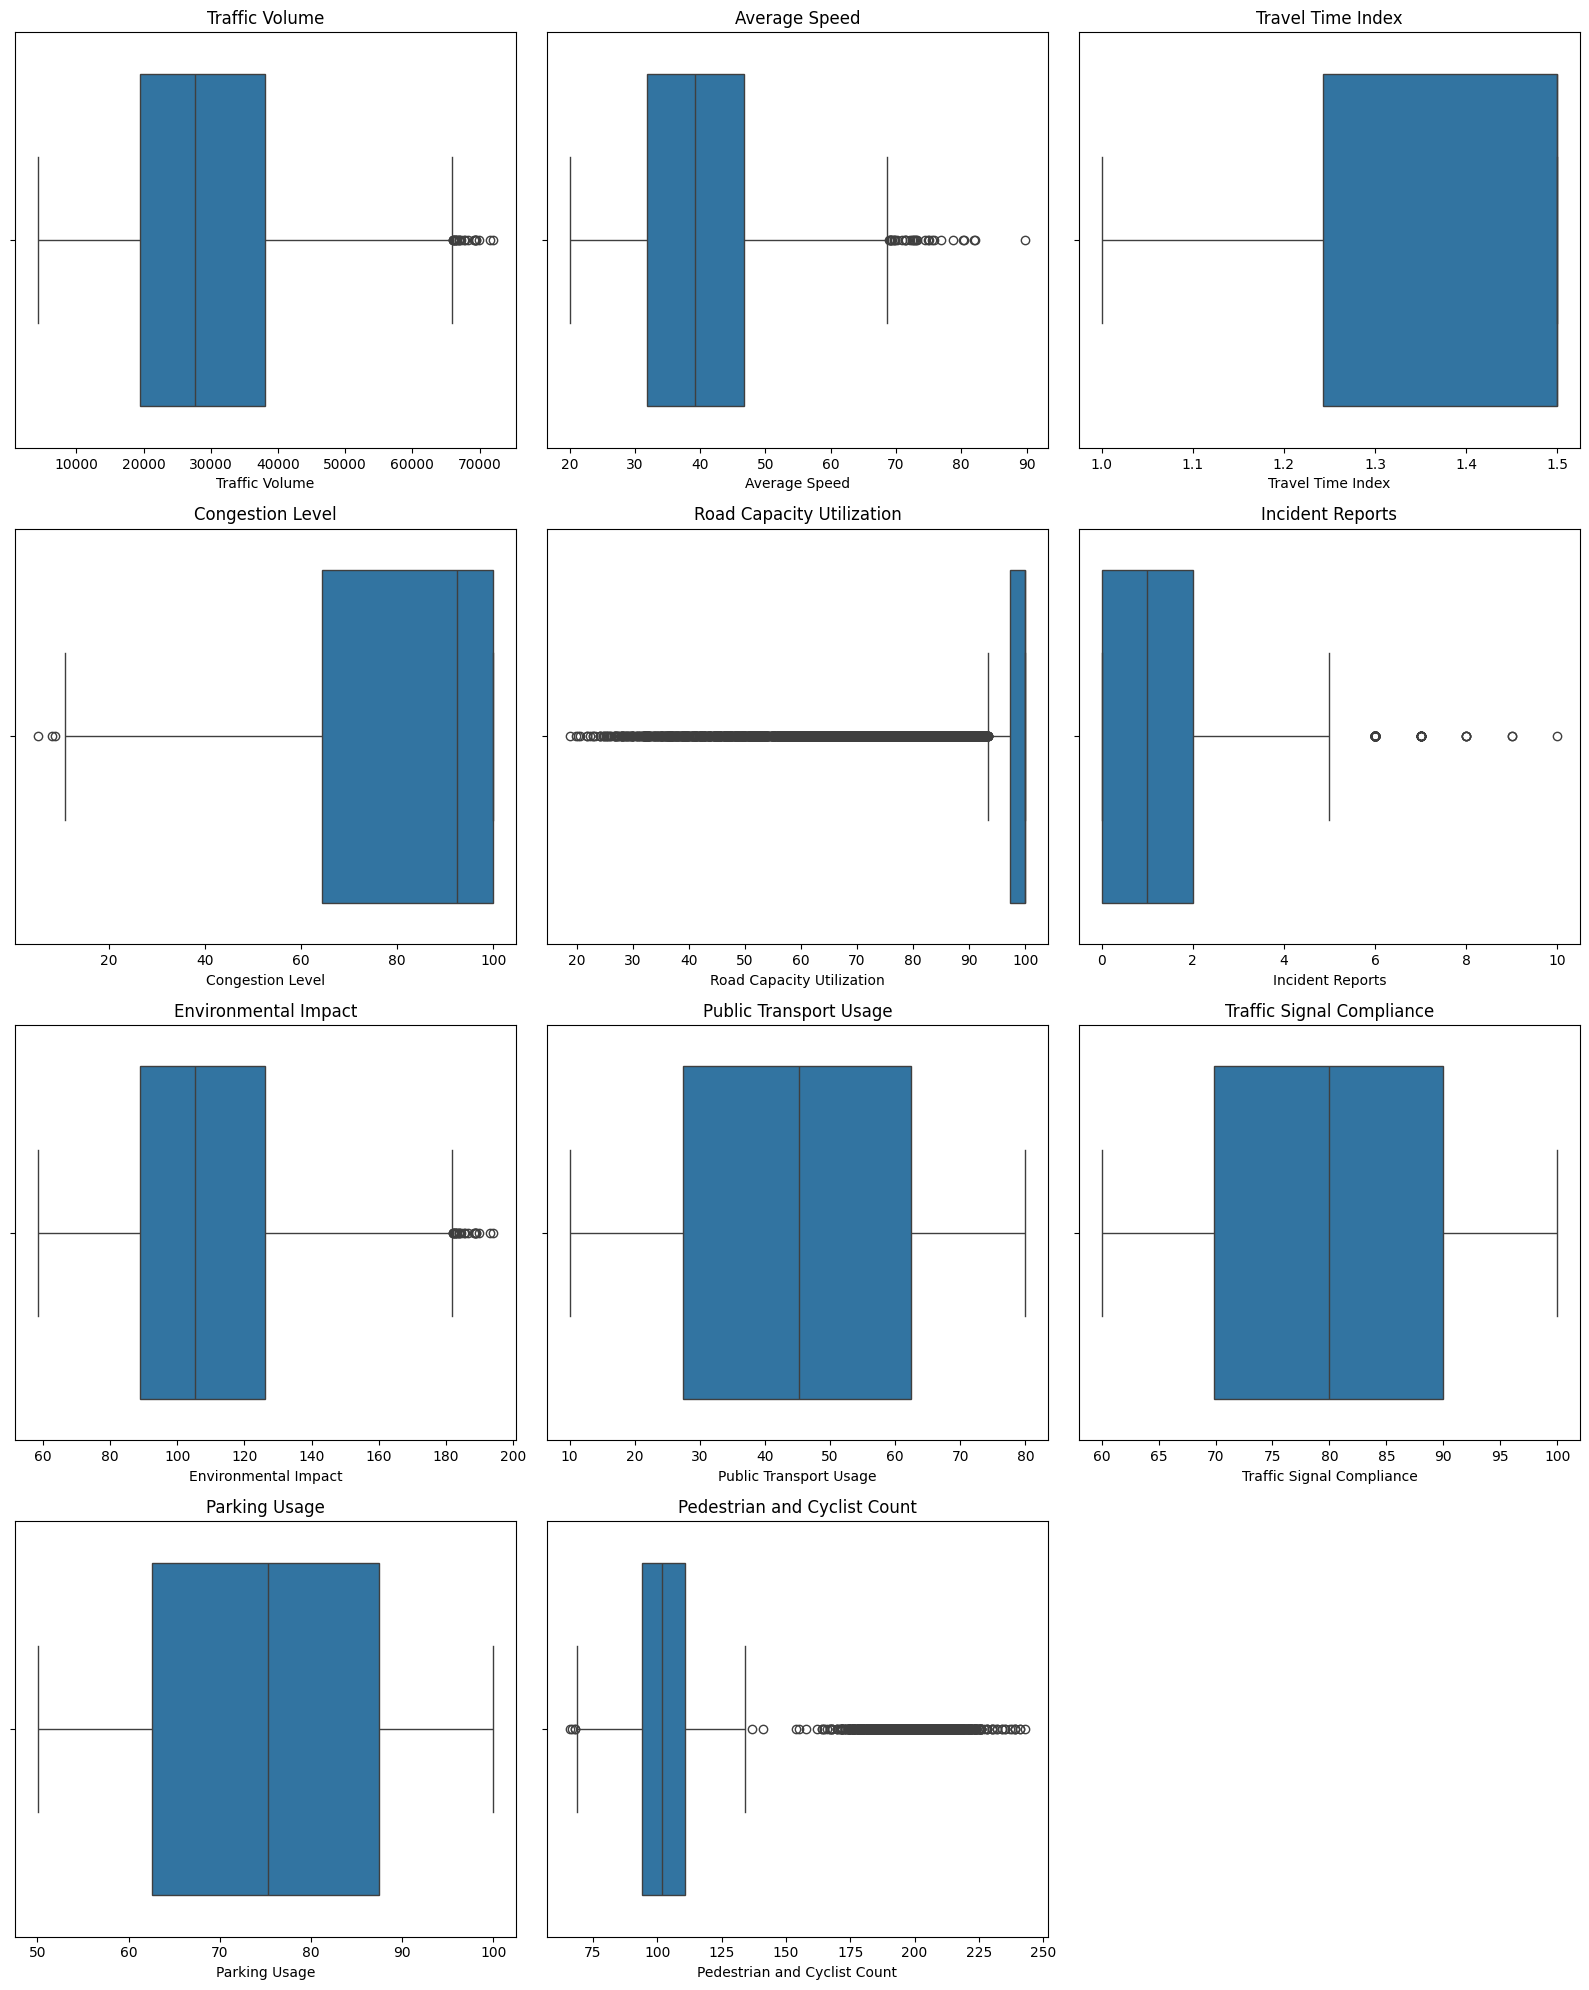

In [10]:
plt.figure(figsize=(16, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Correlation Heatmap


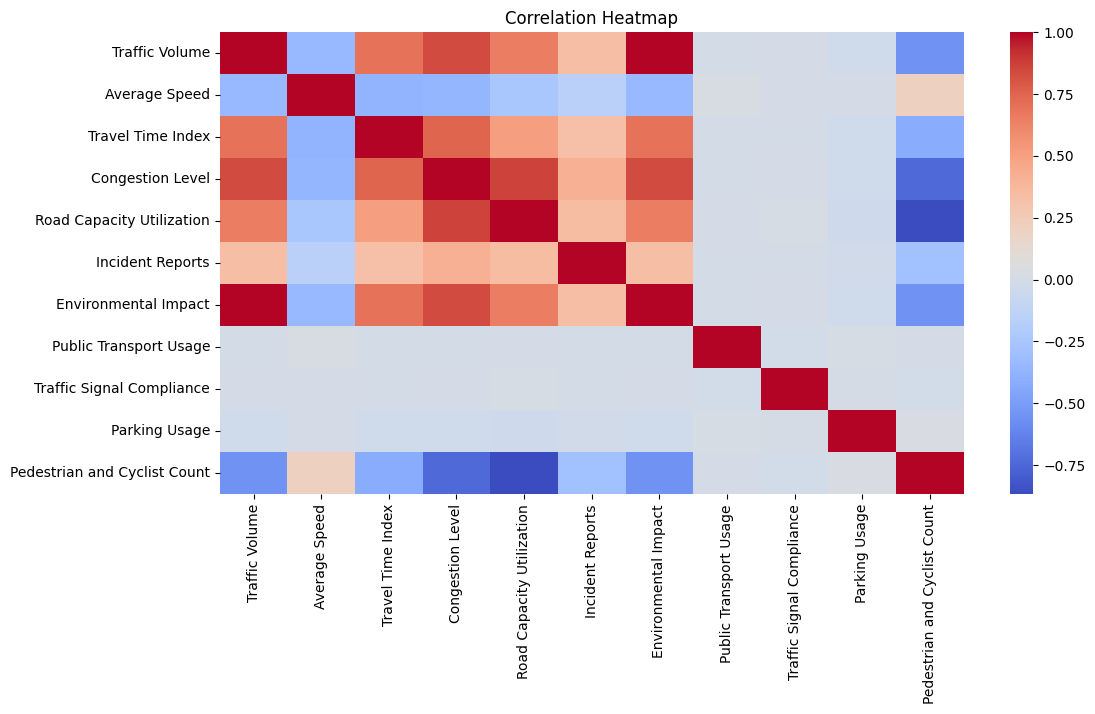

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 4. Data Cleaning

In this section we correct data types, remove invalid values and prepare a cleaned version of the dataset for feature engineering.


In [12]:
df_clean = df.copy()
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')


In [13]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df_clean = df_clean[df_clean[col] >= 0]
    

In [14]:
df_clean = df_clean.reset_index(drop=True)


# 5. Feature Engineering

In this section we engineer new features including the custom target variable (Minutes Wasted) based on ideal vs actual travel time.


In [15]:
df_fe = df_clean.copy()


In [17]:
ideal_speed = df_fe['Average Speed'].quantile(0.95)
ideal_speed


np.float64(57.57301111833921)

In [18]:
df_fe['Distance_km'] = 1.0


In [21]:
df_fe['Actual_Time_Min'] = (df_fe['Distance_km'] / df_fe['Average Speed']) * 60

In [22]:
df_fe['Ideal_Time_Min'] = (df_fe['Distance_km'] / ideal_speed) * 60


In [23]:
df_fe['Minutes_Wasted'] = df_fe['Actual_Time_Min'] - df_fe['Ideal_Time_Min']
df_fe['Minutes_Wasted'] = df_fe['Minutes_Wasted'].clip(lower=0)


In [24]:
df_fe[['Actual_Time_Min','Ideal_Time_Min','Minutes_Wasted']].head()


,Actual_Time_Min,Ideal_Time_Min,Minutes_Wasted
0,1.194498,1.042155,0.152343
1,2.042405,1.042155,1.000250
2,1.101435,1.042155,0.059280
3,1.369312,1.042155,0.327157
4,1.459259,1.042155,0.417104


In [26]:
df_fe['Speed_Drop'] = ideal_speed - df_fe['Average Speed']
df_fe['Speed_Drop'] = df_fe['Speed_Drop'].clip(lower=0)
df_fe['Weekend'] = df_fe['Date'].dt.dayofweek >= 5
df_fe['Weekend'] = df_fe['Weekend'].astype(int)


In [27]:
df_fe['Weather_Enc'] = df_fe['Weather Conditions'].astype('category').cat.codes
df_fe['Roadwork_Enc'] = (df_fe['Roadwork and Construction Activity'] == 'Yes').astype(int)


In [31]:
# saving cleaned dataset

df_fe.to_csv("../data/processed/traffic_fe.csv", index=False)
df_clean.to_csv("../data/processed/traffic_cleaned.csv", index=False)
